[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_C3S.png)](https://climate.copernicus.eu)

# Aggregation of PECD regions (v4.1 and v4.2) into NUTS0 polygons

This notebook provides an overview of how to download one of the available energy indicators from the Pan-European Climate Database version 4.2 ([PECDv4.2](https://cds.climate.copernicus.eu/datasets/sis-energy-pecd?tab=overview)): the onshore wind generation (WON) data at the PEON (PECD onshore regions) level, and how to aggregate it to NUTS0 polygons using pre-specified weights. The analysis focuses on the existing onshore wind generation fleet, considering one year of data (2020) from the historical stream (1950–present).
In principle, this workflow can be extended to include multiple years, climate projection periods (2015–2100), and other wind technologies.

The following data are used in the notebook and need to be downloaded in advance:

1. Pre-calculted [weights](https://gitlab.windenergy.dtu.dk/corres/corres/-/tree/c3s_PECD4.2/c3s_PECD_4.2_runs/inputs_general/Aggregation_weights?ref_type=heads); here we present an example based on the weights related to the existing wind technologies (i.e., the 2020 wind fleet), so the weights are read from Onshore_Existing_run.xlsx which has been converted to csv format. If we were working with a future onshore technology, the weights would instead be taken from Onshore_Future_tech_runs.xlsx and the file converted to csv format prior to the execution of this notebook.
2. PECD version 4.2 data for the Historical temporal stream (based on ERA5 reanalysis). The selected variable is Wind power onshore capacity factor, with Tech type 30 representing existing wind technologies (i.e. the 2020 wind fleet).
3. Shapefiles of NUTS0 and PECDv4.2 polygons, used for spatial reference and visualization.


## Learning objectives 🧠

In this notebook, you will learn on **how to generate NUTS0 data using PECD data and pre-calculated weights**.  In addition, you will learn how to quickly download and read the PECDv4.2 CSV files as well as plotting polygon maps from a given shapefile.

## Target Audience 🎯

**Anyone** interested in spatial aggregation of wind generation timeseries from PECD to NUTS0 using CSV data and region-based weighting.

## Prepare your environment

### Import libraries

In the following, we will import four libraries: the [os](https://docs.python.org/3/library/os.html) module provides functions to interact with the operating system, particularly for handling files, directories, and environment variables. It enables the script to build portable paths and manage local data resources efficiently. The [pathlib](https://docs.python.org/3/library/pathlib.html) module offers an object-oriented interface for working with filesystem paths, making file handling more readable and robust. The [pandas](https://pandas.pydata.org/docs/) library is used to load, manipulate, and analyze tabular datasets, providing high-level data structures and operations. The [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) module is used to create and customize a wide range of visualizations, while [geopandas](https://geopandas.org/en/stable/) provides powerful tools for managing and displaying spatial data. The [cdsapi](https://github.com/ecmwf/cdsapi?tab=readme-ov-file) package enables direct access to the Copernicus Climate Data Store (CDS), making it possible to retrieve the datasets required for this analysis programmatically. The [cartopy](https://cartopy.readthedocs.io/stable/) supports a wide range of map projections, coastlines, and grid features, enabling the creation of detailed and customizable geographic visualizations for scientific and analytical purposes. Finally, [numpy](https://numpy.org/doc/stable) supports efficient numerical computations and is often used for creating and handling arrays or sequences of numerical values.

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy
import cdsapi

### Set up the CDS API and your credentials

This step is essential to be able to download the data. For a complete walkthrough of downloading data from the Climate Data Store (CDS) via the CDS API, see the notebook [*Downloading PECDv4.2 data from the CDS via cdsapi*](./download-data-from-cds.ipynb).

If you have already set up your .cdsapirc file locally, you can upload it directly to your home directory.

Alternatively, you can replace None in the following code cell with your API Token as a string (i.e. enclosed in quotes ```"your_api_key"```). Your token can be found on the [CDS portal](https://cds.climate.copernicus.eu/profile) (you will need to log in to see your credentials).
Remember to agree to the Terms and Conditions of every dataset you intend to download.

In [ ]:
# If you have already setup your .cdsapirc file you can leave this as None
cdsapi_key = None
cdsapi_url = "https://cds.climate.copernicus.eu/api"

## Download the data

In this example, we utilize data from the PECD dataset version 'PECD4.2' for the 'Historical' temporal stream, which is based on 'ERA5 reanalysis' data. The variable selected is the 'Wind power onshore capacity factor', and the technology type 30: Existing wind technologies (i.e., 2020 wind fleet).

The API request reflecting these selections is shown in the next cell.

In [ ]:
# define our dataset
dataset = "sis-energy-pecd"

# dictionary of base request
request = {
    "pecd_version": "pecd4_2",
    "temporal_period": ["historical"],
    "origin": ["era5_reanalysis"],
    "variable": ["wind_power_onshore_capacity_factor"],
    "technology": ["30"],
    "spatial_resolution": ["peon"],
    "year": ["2020"],
}

## Create folders with data
Next, we will create a dedicated folders to store our data (weights and timeseries). 


In [ ]:
# create folder for cds data
input_dir = "./timeseries/"
os.system(f"mkdir -p {input_dir}")

# initialize Client object
client = cdsapi.Client(cdsapi_url, cdsapi_key)
# call the retrieve method that downloads data
client.retrieve(dataset, request, f"{input_dir}/won_cf_data.zip")

# Unzipping every file in our folder
for fname in os.listdir(input_dir):
    if fname.endswith(".zip"):
        os.system(f"unzip {input_dir}/{fname} -d {input_dir}")


0

## Visualize Polygons

/var/folders/1b/dxm9dkmd14j_srmk5z1tzx7m0000gn/T/ipykernel_56735/851073335.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xy=shp["geometry"].loc[mask].centroid.values[0].coords[0],


Text(0.5, 1.0, 'NUTS0 Polygons')

/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/opt/anaconda3/envs/geo_env/lib/python3.13/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)


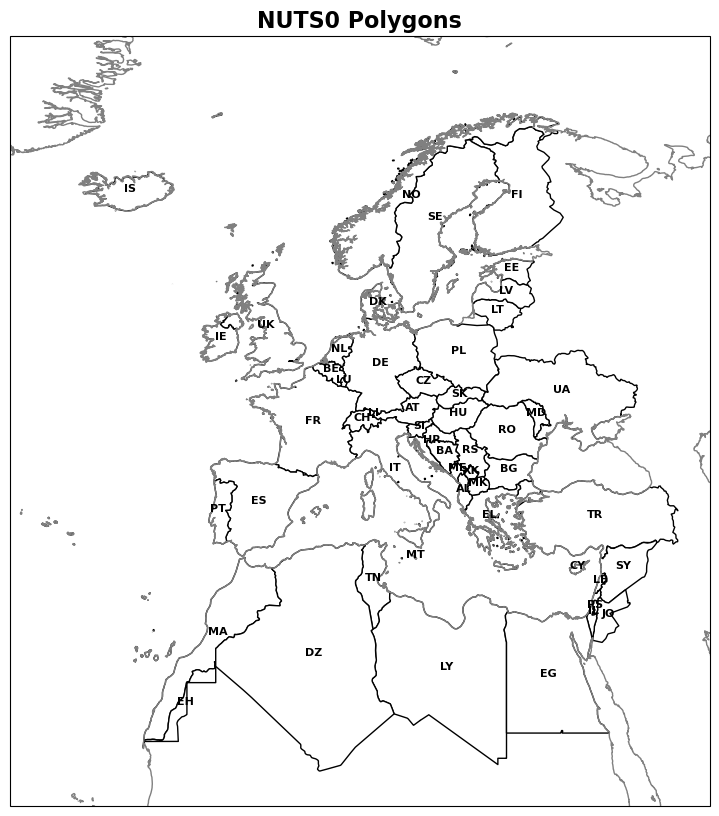

In [5]:
# Visualize NUTS0
#read shapefile
shp=gpd.read_file("zip://./shapefiles/NUT0_ADM0_PECD.zip!NUT0_ADM0_PECD/NUT0_ADM0_PECDCODE.shp")

# make plot
fig = plt.figure(figsize=[10, 10])
map_proj = cartopy.crs.PlateCarree()
ax = plt.axes(projection=map_proj)
ax.coastlines(resolution="10m", color="grey")

shp.plot(color="white", edgecolors="k", linewidths=1, ax=ax)

for iter1 in list(shp["PECD_CODE"]):
    txt_col = "black"

    mask = shp["PECD_CODE"] == iter1

    txt = iter1

    ax.annotate(
        text=txt,
        xy=shp["geometry"].loc[mask].centroid.values[0].coords[0],
        ha="center",
        fontsize=8,
        color=txt_col,
        weight="bold",
    )
    
ax.set_title("NUTS0 Polygons", fontsize=16, fontweight="bold")


/var/folders/1b/dxm9dkmd14j_srmk5z1tzx7m0000gn/T/ipykernel_56735/420597000.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xy=shp["geometry"].loc[mask].centroid.values[0].coords[0],


Text(0.5, 1.0, 'PECD v4.2 Onshore Polygons')

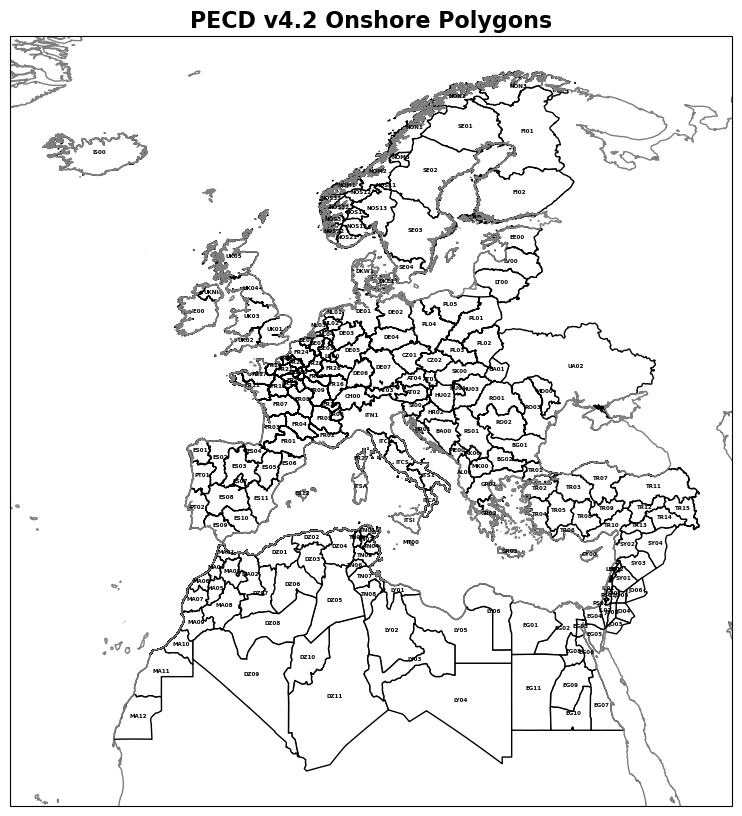

In [6]:
# Visualize PECD v4.2 Onshore Regsions
#read shapefile
shp = gpd.read_file("zip://./shapefiles/PECD42_v2_final.zip!PECD42_v2_final/PECD42_v2_final.shp")
# keep only onshore regions
shp = shp[~shp['Code'].str.contains('_OFF')]

# make plot
fig = plt.figure(figsize=[10, 10])
map_proj = cartopy.crs.PlateCarree()
ax = plt.axes(projection=map_proj)
ax.coastlines(resolution="10m", color="grey")

shp.plot(color="white", edgecolors="k", linewidths=1, ax=ax)

for iter1 in list(shp["Code"]):
    txt_col = "black"

    mask = shp["Code"] == iter1

    txt = iter1

    ax.annotate(
        text=txt,
        xy=shp["geometry"].loc[mask].centroid.values[0].coords[0],
        ha="center",
        fontsize=4,
        color=txt_col,
        weight="bold",
    )

ax.set_title("PECD v4.2 Onshore Polygons", fontsize=16, fontweight="bold")



### Create output folder where the final aggregated data will be saved

In [34]:
# Create output folder that will hold aggregated results
output_folder = "./output/"
Path(output_folder).mkdir(parents=True, exist_ok=True)

### Reading the pre-calculated weights

In this example, we are aggregating existing wind technologies (i.e., the 2020 wind fleet), so the weights are read from Onshore_Existing_run.xlsx. If we were working with a future onshore technology, the weights would instead be taken from Onshore_Future_tech_runs.xlsx.

In [7]:
# Define path to pre-calculated weights file
weight_file_pth = "weights/PECD4.2/Onshore_Existing_run.csv"

# read in pre-calculated weights
reginfo = pd.read_csv(weight_file_pth)
print(reginfo)

    PECD_CODE PECD_STUDY_ZONE Country NUTS0  Weight_in_aggregation  \
0        AT01            AT00      AT    AT                    4.6   
1        AT02            AT00      AT    AT                  294.1   
2        AT03            AT00      AT    AT                 2792.4   
3        BA00            BA00      BA    BA                   86.6   
4        BE01            BE00      BE    BE                  582.7   
..        ...             ...     ...   ...                    ...   
125      UK03            UK00      UK    UK                 2068.2   
126      UK04            UK00      UK    UK                 4854.8   
127      UK05            UK00      UK    UK                 4537.9   
128      UKNI            UKNI      UK    UK                 1217.9   
129      XK00            RS00      XK    XK                   32.4   

     Installed_capacity_MW  
0                      4.6  
1                    294.1  
2                   2792.4  
3                     86.6  
4             

Now we need to build dictionaries to summarize wind capacity weights at both the country and regional levels. These three dictionaries will be used later in the aggregation code

In [36]:

capacity_country_dict = dict()
country_region_dict = dict()

for iter1 in reginfo["NUTS0"].unique():
    mask = (reginfo["NUTS0"] == iter1) & (reginfo["Weight_in_aggregation"] > 0)
    country_region_dict[iter1] = list(reginfo["PECD_CODE"].loc[mask])
    capacity_country_dict[iter1] = sum(reginfo["Weight_in_aggregation"].loc[mask])

capacity_region_dict = dict()
for iter1 in reginfo["PECD_CODE"]:
    mask = reginfo["PECD_CODE"] == iter1
    capacity_region_dict[iter1] = reginfo["Weight_in_aggregation"].loc[mask].values[0]

    
print(capacity_region_dict)




{'AT01': np.float64(4.6), 'AT02': np.float64(294.12), 'AT03': np.float64(2792.407), 'BA00': np.float64(86.6), 'BE01': np.float64(582.71), 'BE02': np.float64(1117.96), 'BE03': np.float64(818.53), 'BG01': np.float64(690.6), 'BG02': np.float64(21.0), 'CH00': np.float64(86.8), 'CY00': np.float64(164.75), 'CZ01': np.float64(226.39), 'CZ02': np.float64(113.67), 'DE01': np.float64(18439.705), 'DE02': np.float64(11548.175), 'DE03': np.float64(5815.227), 'DE04': np.float64(7238.132), 'DE05': np.float64(6444.755), 'DE06': np.float64(1545.362), 'DE07': np.float64(2571.765), 'DKE1': np.float64(679.249), 'DKW1': np.float64(3193.755), 'DZ02': np.float64(10.2), 'EE00': np.float64(383.21), 'EG00': np.float64(1227.47), 'ES01': np.float64(3717.65), 'ES02': np.float64(1773.79), 'ES03': np.float64(5355.905), 'ES04': np.float64(1839.34), 'ES05': np.float64(2764.85), 'ES06': np.float64(1069.05), 'ES08': np.float64(366.2), 'ES09': np.float64(1996.92), 'ES10': np.float64(793.73), 'ES11': np.float64(4401.87), 

Next we need to read the already downloaded timeseries and apply the weights:

In [37]:
# Load CorRES results
ts_fn="timeseries/H_ERA5_ECMW_T639_WON_NA---_Pecd_PEON_S199401010000_E199412312300_CFR_TIM_01h_NA-_noc_org_37_NA---_NA---_PhM02_PECD4.1_fv1.csv"
ts = pd.read_csv(ts_fn, comment="#",index_col="Date")
print(ts)


    

                       AL00    AT01    AT02    AT03    BA00    BE01    BE02  \
Date                                                                          
1994-01-01 00:00:00  0.0308  0.0447  0.2974  0.4296  0.2441  0.0945  0.2417   
1994-01-01 01:00:00  0.0301  0.0319  0.2786  0.3317  0.2488  0.0962  0.2139   
1994-01-01 02:00:00  0.0304  0.0225  0.2196  0.2490  0.2572  0.1009  0.1906   
1994-01-01 03:00:00  0.0318  0.0215  0.1795  0.1724  0.2688  0.1323  0.1753   
1994-01-01 04:00:00  0.0412  0.0169  0.1590  0.1199  0.2849  0.1365  0.1624   
...                     ...     ...     ...     ...     ...     ...     ...   
1994-12-31 19:00:00  0.2545  0.0234  0.0830  0.2310  0.1077  0.3147  0.4643   
1994-12-31 20:00:00  0.2283  0.0245  0.0752  0.1620  0.1234  0.3096  0.4077   
1994-12-31 21:00:00  0.1933  0.0215  0.0652  0.1092  0.1419  0.4249  0.3258   
1994-12-31 22:00:00  0.2209  0.0250  0.0658  0.1125  0.1471  0.5149  0.3458   
1994-12-31 23:00:00  0.2093  0.0194  0.0613  0.1004 

In [38]:
# Apply Weights
weighted_df = ts.multiply(pd.Series(capacity_region_dict), axis=1)
print(weighted_df)

                     AL00     AT01       AT02         AT03      BA00  \
Date                                                                   
1994-01-01 00:00:00   NaN  0.20562  87.471288  1199.618047  21.13906   
1994-01-01 01:00:00   NaN  0.14674  81.941832   926.241402  21.54608   
1994-01-01 02:00:00   NaN  0.10350  64.588752   695.309343  22.27352   
1994-01-01 03:00:00   NaN  0.09890  52.794540   481.410967  23.27808   
1994-01-01 04:00:00   NaN  0.07774  46.765080   334.809599  24.67234   
...                   ...      ...        ...          ...       ...   
1994-12-31 19:00:00   NaN  0.10764  24.411960   645.046017   9.32682   
1994-12-31 20:00:00   NaN  0.11270  22.117824   452.369934  10.68644   
1994-12-31 21:00:00   NaN  0.09890  19.176624   304.930844  12.28854   
1994-12-31 22:00:00   NaN  0.11500  19.353096   314.145788  12.73886   
1994-12-31 23:00:00   NaN  0.08924  18.029556   280.357663  14.29766   

                           BE01        BE02        BE03       B

In [40]:
# Aggregate 
aggregated_data = {}
for group, columns in country_region_dict.items():
    aggregated_data[group] = weighted_df[columns].sum(axis=1)

# Create the final aggregated DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Normalize by total capacity per country or region
aggregated_df = aggregated_df.divide(pd.Series(capacity_country_dict), axis=1)

print(aggregated_df)

                           AT      BA        BE        BG      CH      CY  \
Date                                                                        
1994-01-01 00:00:00  0.416448  0.2441  0.238129  0.039141  0.1429  0.1799   
1994-01-01 01:00:00  0.326201  0.2488  0.217737  0.037453  0.1187  0.2534   
1994-01-01 02:00:00  0.245866  0.2572  0.200719  0.046714  0.1737  0.2407   
1994-01-01 03:00:00  0.172851  0.2688  0.186116  0.045497  0.3432  0.2176   
1994-01-01 04:00:00  0.123467  0.2849  0.192767  0.037315  0.4807  0.2248   
...                       ...     ...       ...       ...     ...     ...   
1994-12-31 19:00:00  0.216609  0.1077  0.459556  0.571121  0.4959  0.0878   
1994-12-31 20:00:00  0.153536  0.1234  0.428028  0.673589  0.5060  0.0978   
1994-12-31 21:00:00  0.104883  0.1419  0.366788  0.668209  0.5718  0.1033   
1994-12-31 22:00:00  0.107926  0.1471  0.434301  0.690962  0.6653  0.1333   
1994-12-31 23:00:00  0.096559  0.1651  0.334319  0.576165  0.6876  0.1343   

In [42]:
# ## Save Results
file_name = os.path.basename(ts_fn)
output_file = Path(output_folder) / f"{file_name.split('.')[0]}_NUTS0_level.csv"
aggregated_df.to_csv(output_file)


## Take home messages 📌

* The code above illustrates how to convert onshore wind generation time series from PECD v4.2 into NUTS0-level polygons.

* Aggregating wind generation to any set of polygons requires a weighted approach, where the weights correspond to the relative installed capacities of the regions.

* CSV-based energy data can be easily loaded, explored, and summarized using pandas, allowing for efficient analysis and manipulation.

* Using dictionaries to store region- and country-level weights enables quick access and flexible aggregation of time series.

* Visualization of spatial data with GeoPandas and Cartopy helps in mapping and verifying the regional aggregation.

* This workflow can be extended to future wind technologies by simply change the weight file, making it adaptable to different scenarios.